# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Подгружаем необходимые библиотеки и устанавливаем опции отображения

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

### A. Чтение архива и изучение общей инофрмации.

In [2]:
try:
    realty_data = pd.read_csv('C://Users/den_m/Desktop/Den_DA/Yandex/Projects/Project_2_sprint_5/real_estate_data.csv', sep='\t')
except:
    realty_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

realty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
display(realty_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,...,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00


In [4]:
initial_data = realty_data.shape[0] # вводим переменную для сохранения изначального количества записей.
print(initial_data)

23699


In [5]:
print(realty_data.isna().sum()) # получаем кол-во пустых значений в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


''

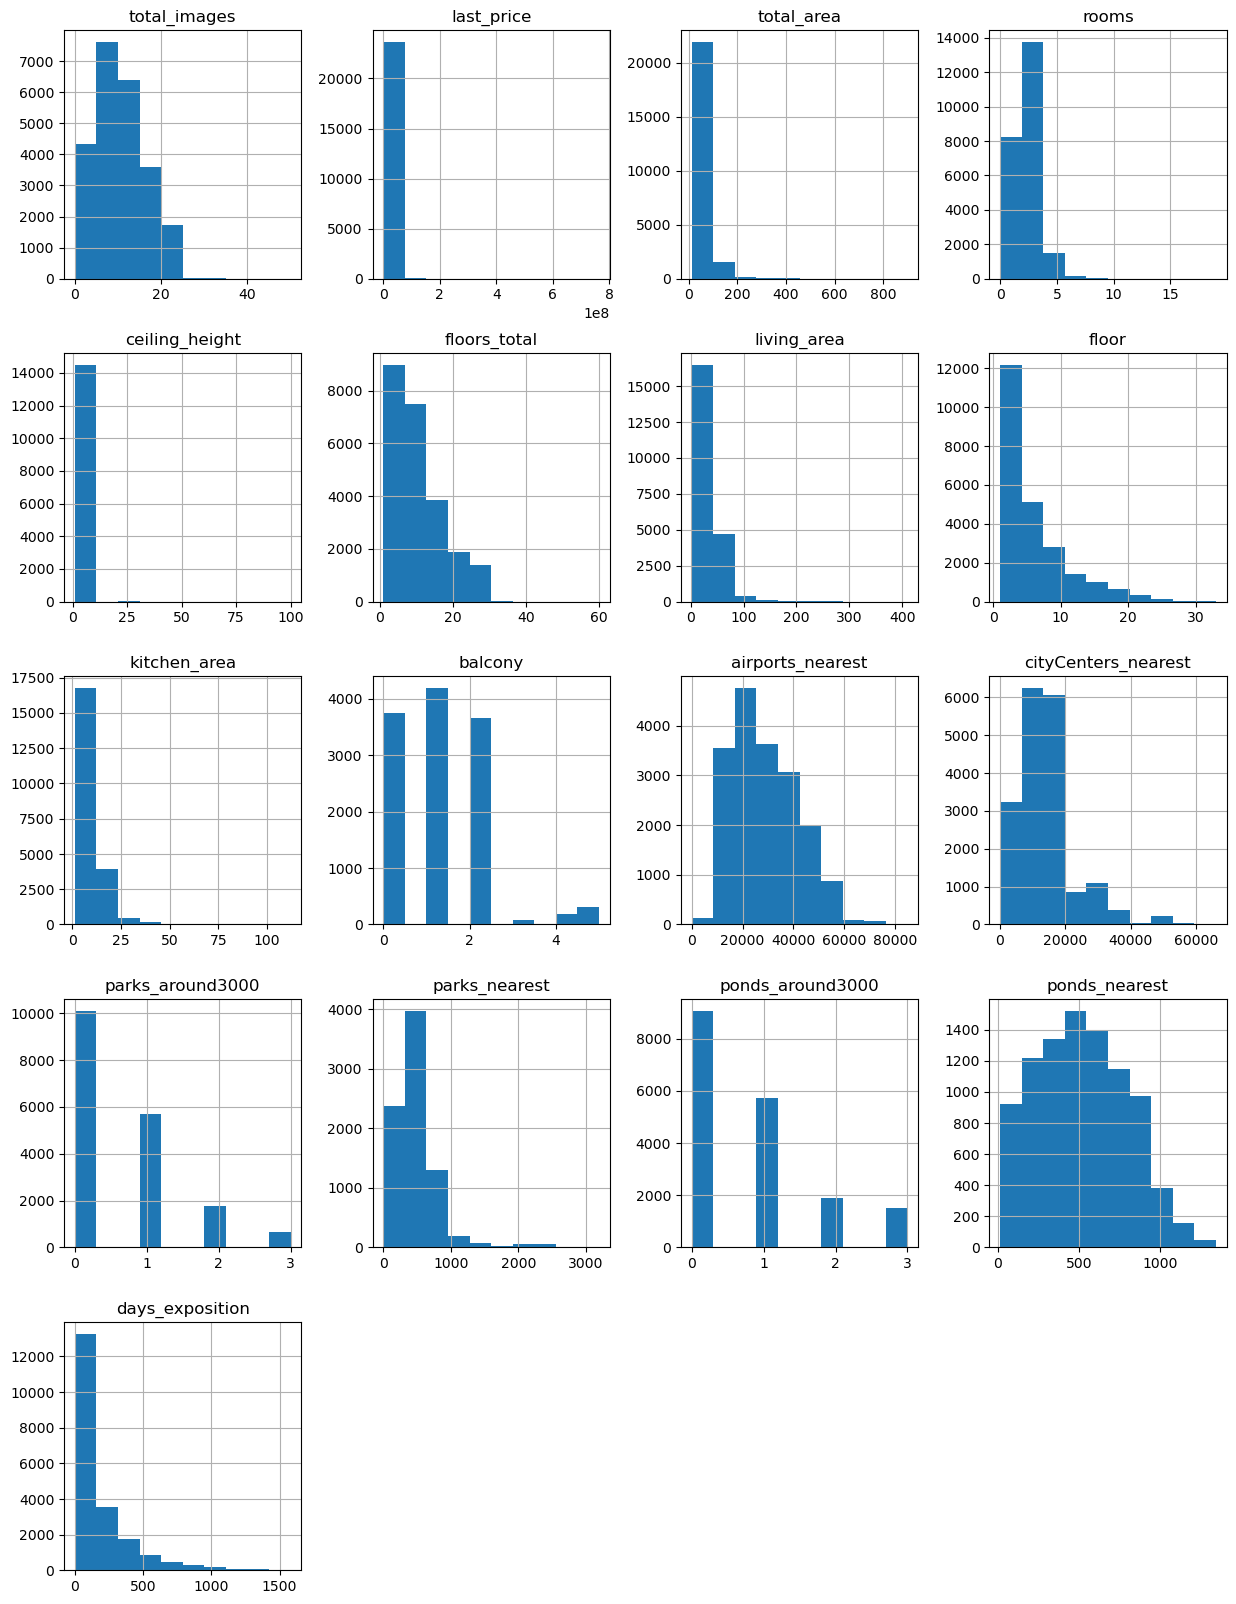

In [6]:
realty_data.hist(figsize=(15,20)) # строим гистограммы для столбцов с числовыми значениями
''

#### Что сделано

- с помощью функции info() получили информацию по названиям стоолбцов, количествам и типам данных для каждого столбца
- с помощью функции isna() получили количество ппропущенных значений для каждого столбца
- с помощью функции hist() вывели гистограммы для числовых столбцов таблицы

#### Первые/предварительные выводы

- количество строк в базе = 23699
- названия столбцов корректны - > переименования не требуется
- нулевых столбцов нет, но не все столбцы заполнены данными.


-> переходим к следующему этапу - предобработка данных

### B. Предобработка данных / Работа с пропусками

#### 1. обрабатываем пропуски в столбце 'ceiling_height' (высота потолков (м))

In [7]:
print(realty_data['ceiling_height'].sort_values().unique()) # получаем диапазон значений для высоты потолков
realty_data['ceiling_height'].describe()

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

В целях нашего анализа, принимаем, что высота потолков не играет решающего значения в определении стоимости квартиры.
Аномальные значения, скорее всего, вызваны невнимательностью клиентов.
Но исправим всё что можем.
Для указанных ниже аномальных значений предлагается выполнить следующие действия:

- a. высота потолков 20 м и выше - логично предположить, что при вводе значений была нарушена разрядность -> корректируем, делим на 10 -> разработчикам: предусмотреть контроль верхнего диапазона вводимых значений, например, "не более чем 10 м"
- b. высота потолков ниже 2.5 и выше 6 метров -> принять значение равным медианному - > разработчикам: предусмотреть контроль диапазона вводимых значений, например, для нижнего "не менее чем 2.5 м", а для вержнего "не более чем 6 м" 
- c. для пустых значений Nan (в количестве 9195) -> принять значение высоты равным медианному -> разработчикам: предусмотреть обязательный ввод высоты потолков.


In [8]:
# check_list = list(realty_data.loc[realty_data['ceiling_height'] >= 20, 'ceiling_height'].index) # для себя, проверка корректности заполнения данных 
# print(realty_data.loc[check_list,['ceiling_height']]) # для себя, проверка корректности заполнения данных 

realty_data.loc[realty_data['ceiling_height'] >= 20, 'ceiling_height'] = realty_data['ceiling_height'] / 10 # отработали "a"

realty_data.loc[(realty_data['ceiling_height'] <= 2.5) | (realty_data['ceiling_height'] > 6) | (realty_data['ceiling_height'].isna()),'ceiling_height'] = realty_data['ceiling_height'].median() # отработали "b" и "c"

#print(realty_data.loc[check_list,['ceiling_height']]) # для себя, проверка корректности заполнения данных


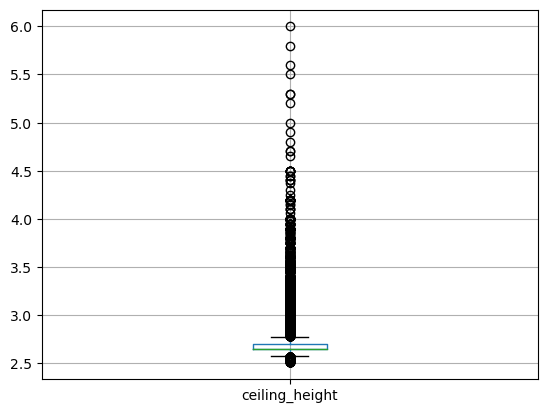

In [9]:
realty_data.boxplot(column='ceiling_height') # посмотрим полученную картину на диаграмме размаха.
#plt.show()
plt.show("png")

На диаграмме размаха наблюдаются незначительные выбросы выше 4.5 м. Оставим как есть, ввиду не значительного влияния на конечный результат, а также неопределённости критериев для корректирвки.

#### 2. обрабатываем пропуски в столбце  'floors_total' (всего этажей в доме)

In [10]:
print(realty_data['floors_total'].sort_values().unique()) # получаем диапазон значений для всего этажей
realty_data['floors_total'].describe()

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.
 nan]


count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

Для пустых значений Nan в столбце 'floors_total', можем принять значение конкретного этажа, на котором находится реализуемая квартира.
Причинами пропусков могут быть:
- то что этаж продаваемой квартиры является последним в доме
- невнимательность/нежелание при заполнении данного параметра

Разработчикам: либо сделать ввод обязательным, либо, если этажность не проставлена, автоматически присваивать значение текущего этажа из объявления. Если есть возможность получать этажность с помощью баз недвижимости, то попробовать реализовать.

In [11]:
# check_list = list(realty_data.loc[realty_data['floors_total'].isna(),'floors_total'].index) # для себя, проверка корректности заполнения данных 
# print(realty_data.loc[check_list,['floors_total','floor']]) # для себя, проверка корректности заполнения данных

realty_data.loc[realty_data['floors_total'].isna(),'floors_total'] = realty_data['floor']

# print(realty_data.loc[check_list,['floors_total','floor']]) # для себя, проверка корректности заполнения данных

In [12]:
realty_data['floors_total'] = realty_data['floors_total'].astype('int') # количество этажей целочисленное, изменяем тип float на int

#### 3. обрабатываем пропуски в столбце  'is_apartment' (апартаменты)

Пропуски в столбце 'is_apartment', скорее всего вызваны тем, что квартира не является аппартаментами, поэтому пользователь проигнорировал заполнение этого параметра.
В нашем случае, исправим все Nan на False.

Но! фактически, значение этого параметра может иметь значение при расчёте стоимости жилья, поэтому рекомендация разработчикам сделать заполнение этого параметра обязательным.

In [13]:
realty_data.loc[realty_data['is_apartment'].isna(),'is_apartment'] = False

In [14]:
realty_data['is_apartment'] = realty_data['is_apartment'].astype('bool') # с учётом булева типа данных для этого параметра, изменяем тип object на bool

#### 4. обрабатываем пропуски в столбце  'balcony' (число балконов)

Аналогично, предыдущему, пропуски в столбце 'balcony', скорее всего вызваны тем, что в квартире нет балконов, поэтому пользователь проигнорировал заполнение этого параметра.
В нашем случае, исправим все Nan на 0.

Но! фактически, значение этого параметра может иметь значение при расчёте стоимости жилья, поэтому рекомендация разработчикам сделать заполнение этого параметра обязательным.

In [15]:
realty_data.loc[realty_data['balcony'].isna(),'balcony'] = 0

In [16]:
realty_data['balcony'] = realty_data['balcony'].astype('int') # число балконов целочисленное, изменяем тип float на int

#### 5. обрабатываем пропуски в столбце  'living_area' (жилая площадь в квадратных метрах (м²))

In [17]:
print(realty_data['living_area'].sort_values().unique()) # получаем диапазон значений для жилой площади

[  2.    3.    5.  ... 409.  409.7   nan]


Метраж жилой площади является одним из определяющих значений для расчёта стоимости жилья (относительно легко может быть определён продавцом и, соответственно, указан в объявлении).
Но, при этом наблюдается довольно много объявлений без указания жилой площади.

Ввиду того, что нам не известны площади санузла, коридора, нежилых помещений, мы не можем корректно произвести расчёт для Nan исходя из имеющихся значений общей площади квартиры и площади кухни.

Предлагается замену Nan (в количестве 1903) для этого параметра посчитать от жилой площади.
Для этого:
- определяем медиану отношений жилой площади к общей площади.
- для каждого Nan умножаем общую площадь на полученную выше величину.

In [18]:
indexes_nan = list(realty_data.loc[(realty_data['living_area'].isna()),'living_area'].index) # получили список индексов строк где значение 'living_area' = Nan
# в цикле все Nan заменяем на произведение общей площади квартры на медиану отношения жилой площади к общей площади.  
for row in indexes_nan:
    realty_data.loc[row,'living_area'] = realty_data.loc[row,'total_area'] * (realty_data['living_area'] / realty_data['total_area']).median()

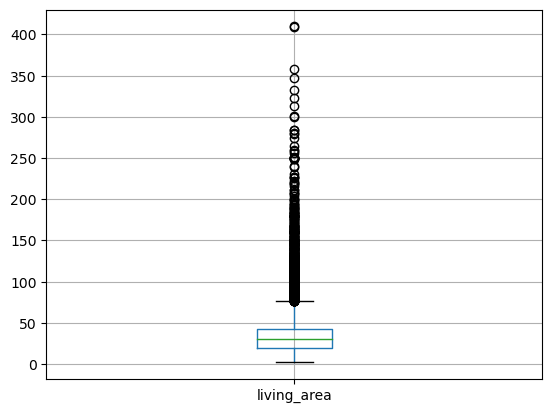

In [19]:
realty_data.boxplot(column='living_area') # посмотрим на диаграмму размаха.
plt.show()

<br>можно отметить аномально низкие значения жилой площади (< 9 м2)
<br>предлагается исключить такие данные из анализа.

In [20]:
realty_data = realty_data.loc[realty_data['living_area'] >= 9] # убрали все строки где living_area < 9 м2

Разработчикам: обеспечить обязательность ввода метража жилой площади и контроль вводимого значения "не менее чем"

#### 6. обрабатываем пропуски в столбце  'kitchen_area' (площадь кухни в квадратных метрах (м²))

In [21]:
print(realty_data['kitchen_area'].sort_values().unique()) # получаем диапазон значений для площади кухни

[  1.3    2.     2.3    2.4    2.89   3.     3.2    3.3    3.4    3.5
   3.7    3.8    4.     4.1    4.2    4.3    4.4    4.5    4.6    4.7
   4.8    4.9    5.     5.04   5.06   5.1    5.14   5.2    5.21   5.23
   5.25   5.28   5.29   5.3    5.31   5.33   5.35   5.4    5.42   5.44
   5.47   5.49   5.5    5.53   5.59   5.6    5.61   5.62   5.64   5.65
   5.68   5.7    5.74   5.75   5.78   5.8    5.82   5.85   5.86   5.9
   5.91   6.     6.02   6.03   6.1    6.16   6.19   6.2    6.22   6.23
   6.24   6.25   6.26   6.27   6.28   6.3    6.31   6.33   6.35   6.36
   6.37   6.4    6.47   6.5    6.55   6.58   6.6    6.61   6.62   6.65
   6.7    6.72   6.73   6.76   6.77   6.8    6.82   6.83   6.84   6.86
   6.9    6.91   6.93   6.95   7.     7.02   7.03   7.06   7.09   7.1
   7.12   7.15   7.17   7.18   7.19   7.2    7.3    7.36   7.4    7.41
   7.48   7.5    7.54   7.6    7.63   7.65   7.7    7.71   7.78   7.8
   7.84   7.85   7.86   7.87   7.89   7.9    7.92   7.94   7.95   7.97
   8.     8

Метраж кухни также не везде указан.

Аналогично предыдущему разделу, предлагается замену Nan (в количестве 2278) для этого параметра также посчитать от жилой площади.
Для этого:
- определяем медиану отношений площади кухни к общей площади.
- для каждого Nan умножаем общую площадь на полученную выше величину.

In [22]:
indexes_nan = list(realty_data.loc[(realty_data['kitchen_area'].isna()),'kitchen_area'].index)
for row in indexes_nan:
    realty_data.loc[row,'kitchen_area'] = realty_data.loc[row,'total_area']*(realty_data['kitchen_area'] / realty_data['total_area']).median()

Можно отметить аномально низкие значения площади кухни (< 3 м2). Предлагается исключить такие данные из анализа.

In [23]:
realty_data = realty_data.loc[realty_data['kitchen_area'] >= 3] # убрали все строки где kitchen_area < 3 м2

#### 7. исправляем данные и обрабатываем пропуски в столбце 'locality_name' (название населённого пункта)

In [24]:
print(realty_data['locality_name'].sort_values().unique()) # получаем список названий населённых пунктов

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

производим замену в названиях:
- 'поселок' -> 'посёлок'
- 'городской посёлок' - 'посёлок городского типа'
- а также где есть разночетния 'посёлок' или 'деревня' - всё переводим в 'деревня'.

Разработчикам, по возможности, синхронизировать поле ввода населённого пункта с федеральной базой для корректного ввода/отображения типа/вида населённого пункта.

In [25]:
print(realty_data['locality_name'].str.contains('поселок').sum()) # проверяем количество написания слова 'поселок'
realty_data['locality_name'] = realty_data['locality_name'].str.replace('поселок','посёлок')
print(realty_data['locality_name'].str.contains('поселок').sum()) # проверяем качество замены

print(realty_data['locality_name'].str.contains('городской посёлок').sum()) # проверяем количество написания слова 'городской посёлок'
realty_data['locality_name'] = realty_data['locality_name'].str.replace('городской посёлок','посёлок городского типа')
print(realty_data['locality_name'].str.contains('городской посёлок').sum()) # проверяем качество замены

realty_data['locality_name'] = realty_data['locality_name'].str.replace('поселок Гарболово','деревня Гарболово')

# в списке имеются ещё несколько одинаковых названий с вариантами написания 'посёлок' или 'деревня'. Так как это не является основной задачей, не стал их все переводить

552
0
187
0


In [26]:
# print(realty_data.loc[realty_data['locality_name'].isna(),'locality_name']) # проверяем Nan

# в цикле заменяем все Nan на 'не определено'
#for row in list(realty_data.loc[(realty_data['locality_name'].isna()),'locality_name'].index):
#    realty_data.loc[row,'locality_name'] = 'не определено'

# альтернативный вариант с применением np.where
realty_data['locality_name'] = np.where(realty_data['locality_name'].isna(),'не определено',realty_data['locality_name'])

print(realty_data.loc[realty_data['locality_name'] == 'не определено','locality_name']) # проверяем замену Nan на 'не определено'

1097     не определено
2033     не определено
2603     не определено
2632     не определено
3574     не определено
4151     не определено
4189     не определено
4670     не определено
5343     не определено
5707     не определено
6765     не определено
7114     не определено
7330     не определено
7600     не определено
8568     не определено
8986     не определено
9821     не определено
10122    не определено
11248    не определено
12879    не определено
12936    не определено
13223    не определено
13690    не определено
14273    не определено
14342    не определено
15686    не определено
15866    не определено
16499    не определено
16561    не определено
16610    не определено
17535    не определено
17764    не определено
18526    не определено
18917    не определено
19045    не определено
19972    не определено
20057    не определено
20382    не определено
20590    не определено
20654    не определено
21119    не определено
21276    не определено
21333    не определено
21715    не

Разработчикам -> сделать обязательным ввод населённого пункта.

#### 8. обработка пропусков для картографических данных

Населённые пункты и конкретные адреса имеют строгую географическую привязку и соответствующие координаты, которые позволяют с помощью картографических сервисов/баз оценить такие параметры как:

- airports_nearest (расстояние до ближайшего аэропорта в метрах)
- cityCenters_nearest (расстояние до центра города (м))
- parks_around3000 (число парков в радиусе 3 км)
- parks_nearest (расстояние до ближайшего парка (м))
- ponds_around3000 (число водоёмов в радиусе 3 км)
- ponds_nearest (расстояние до ближайшего водоёма (м))

Значительное количество Nan для этих параметров возможно исправить с помощью более полной/точной картографической базы, либо алгоритмов расчёта.

Заполнить самостоятельно с применением медианных, средних, минимальных или максимальных значений - было бы не правильно, так как приведёт к искажению результатов. Оставляем как есть.

#### 9. обработка пропусков для 'days_exposition' (сколько дней было размещено объявление (от публикации до снятия))

Количество дней размещения объявления легко посчитать, при условии если зафиксированы начальная (в нашем случае, такая фиксация есть) и конечная даты публикации объявления.
Получаем что для 3181 объявления либо не зафиксирована конечная дата публикации, либо некорректно отработал алгоритм расчёта количества дней публикации.

Заполнить самостоятельно с применением медианных, средних, минимальных или максимальных значений - было бы не правильно, так как приведёт к искажению результатов. Оставляем как есть.

Разработчикам: проверить алгоритмы фиксации даты снятия объявлений, а также расчёта количества дней размещения.  

#### 10. обработка аномалий для 'last_price' (цена на момент снятия с публикации)

In [27]:
print(realty_data['last_price'].sort_values().unique()) # получаем диапазон значений

[1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]


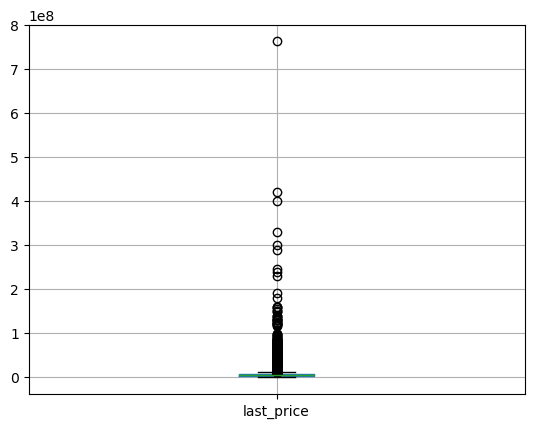

In [28]:
realty_data.boxplot(column='last_price') # посмотрим на диаграмму размаха.
plt.show()

<br>неправдоподобной выглядит цена = 12190.
<br>на диаграмме размаха видим редкие, выбивающиеся значения от 200 млн. руб.
<br>избавимся от них.

In [29]:
realty_data= realty_data.loc[(realty_data['last_price'] != 12190) & (realty_data['last_price'] <= 200000000)]
# print(realty_data['last_price'].sort_values().unique()) # для себя проверка результата

#### 11. обработка аномалий для 'airports_nearest' (расстояние до ближайшего аэропорта в метрах (м))

In [30]:
print(realty_data['airports_nearest'].sort_values().unique()) # получаем диапазон значений

[    0.  6450.  6914. ... 84853. 84869.    nan]


неправдоподобным выглядит расстояние = 0. Избавимся от такой записи.

In [31]:
realty_data= realty_data.loc[realty_data['airports_nearest'] != 0]
print(realty_data['airports_nearest'].sort_values().unique()) # проверям результат

[ 6450.  6914.  6949. ... 84853. 84869.    nan]


#### 12. обработка аномалий для 'total_aria' (общая площадь квартиры в квадратных метрах (м²))

[ 17.    17.6   17.78 ... 590.   631.   631.2 ]


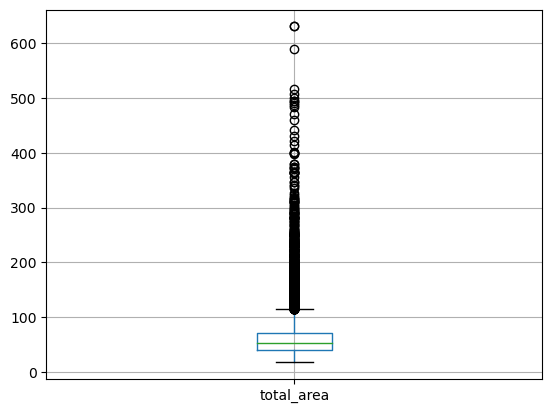

In [32]:
print(realty_data['total_area'].sort_values().unique())
realty_data.boxplot(column='total_area') # посмотрим на диаграмму размаха.
plt.show()

<br>редкие, выбивающиеся значения  общей площади квартиры меньше 20 и более 300 м2
<br>избавимся от них.

In [33]:
realty_data= realty_data.loc[(realty_data['total_area'] >= 20) & (realty_data['total_area'] <= 300)]
#print(realty_data['total_area'].sort_values().unique()) # для себя проверка результата

#### 13. обработка аномалий для 'rooms' (число комнат)

[ 0  1  2  3  4  5  6  7  8  9 10 11 14 16]


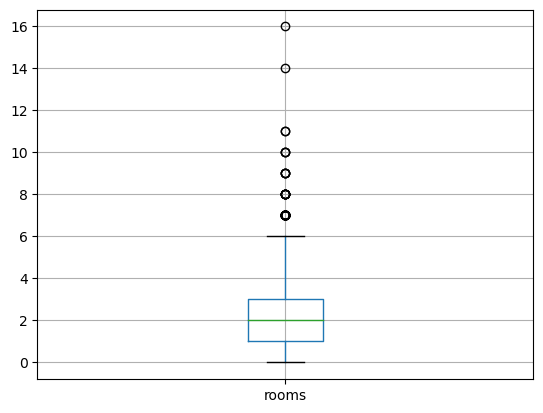

In [34]:
print(realty_data['rooms'].sort_values().unique())
realty_data.boxplot(column='rooms') # посмотрим на диаграмму размаха.
plt.show()

<br>редкие, выбивающиеся значения с количеством комнат > 8
<br>избавимся от них.

In [35]:
realty_data= realty_data.loc[(realty_data['rooms'] != 0) & (realty_data['rooms'] <= 8)]
print(realty_data['rooms'].sort_values().unique()) # для себя проверка результата

[1 2 3 4 5 6 7 8]


Проверяем как сильно уменьшилась база

In [36]:
new_data = realty_data.shape[0]
print('актуальный объём базы:', new_data, 'записей' '\n'
'вынуждены были отбросить: '"{0:.2%}".format(1-(new_data / initial_data)), 'данных')

актуальный объём базы: 23386 записей
вынуждены были отбросить: 1.32% данных


### Результаты и общие выводы по разделу Предобработка данных / Работа с пропусками

На данном этапе, были выполнены следующие действия:

1. заполнены пропуски для:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name

2. не заполнены пропуски для картографических параметров и количества дней размещения

- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest

- days_exposition

3. Были обнаружены и обработаны аномальные значения для:
- ceiling_height
- living_area
- kitchen_area
- last_price
- airports_nearest
- total_aria
- rooms

4. Исправлены названия населённых пунктов для 'locality_name'  

5. были исправлены типы данных для:
 - floors_total  float ->   int
 - is_apartment  object - > bool 
 - balcony       float ->   int
 
6. Рекомендации разработчикам (если такие имеют место быть) зафиксированы в каждом разделе.

по факту указанных выше изменений, база выглядит следующим образом:

In [37]:
realty_data.reset_index(inplace = True) # переиндексируем
realty_data.info()
print('*'*60)
print(realty_data.isna().sum()) # получаем кол-во пустых значений в столбцах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23386 non-null  int64  
 1   total_images          23386 non-null  int64  
 2   last_price            23386 non-null  float64
 3   total_area            23386 non-null  float64
 4   first_day_exposition  23386 non-null  object 
 5   rooms                 23386 non-null  int64  
 6   ceiling_height        23386 non-null  float64
 7   floors_total          23386 non-null  int32  
 8   living_area           23386 non-null  float64
 9   floor                 23386 non-null  int64  
 10  is_apartment          23386 non-null  bool   
 11  studio                23386 non-null  bool   
 12  open_plan             23386 non-null  bool   
 13  kitchen_area          23386 non-null  float64
 14  balcony               23386 non-null  int32  
 15  locality_name      

### C. Считаем и добавляем в таблицу новые столбцы

#### 1. Определяем цену одного квадратного метра

In [38]:
realty_data['one_meter_price'] = realty_data['last_price'] / realty_data['total_area']
print(realty_data['one_meter_price'].sort_values().unique()) # проверка

[  7962.96296296   9615.38461538  10185.18518519 ... 841379.31034483
 848484.84848485 995983.93574297]


#### 2. День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [39]:
realty_data['day_of_week_exposition'] = pd.DatetimeIndex(realty_data['first_day_exposition']).dayofweek
print(realty_data['day_of_week_exposition'].sort_values().unique()) # проверка

[0 1 2 3 4 5 6]


#### 3. День публикации объявления

In [40]:
realty_data['day_exposition'] = pd.DatetimeIndex(realty_data['first_day_exposition']).day
print(realty_data['day_exposition'].sort_values().unique()) # проверка

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


#### 4. месяц публикации объявления

In [41]:
realty_data['month_exposition'] = pd.DatetimeIndex(realty_data['first_day_exposition']).month
print(realty_data['month_exposition'].sort_values().unique()) # проверка

[ 1  2  3  4  5  6  7  8  9 10 11 12]


#### 5. год публикации объявления

In [42]:
realty_data['year_exposition'] = pd.DatetimeIndex(realty_data['first_day_exposition']).year
print(realty_data['year_exposition'].sort_values().unique()) # проверка

[2014 2015 2016 2017 2018 2019]


#### 6. тип этажа квартиры (значения — «первый», «последний», «другой»)

In [43]:
for row in range(len(realty_data)):
    if realty_data.loc[row,'floor'] == 1:
        realty_data.loc[row,'which_floor'] = 'первый'
    elif realty_data.loc[row,'floor'] == realty_data.loc[row,'floors_total']:
        realty_data.loc[row,'which_floor'] = 'последний'
    else:
        realty_data.loc[row,'which_floor'] = 'другой'
print(realty_data['which_floor'].sort_values().unique()) # проверка

['другой' 'первый' 'последний']


#### 7. расстояние до центра города в километрах (переводим из м в км и округляем до целых значений)

In [44]:
# если cityCenters_nearest = Nan, то заполняем нулями, иначе - переводим в км
realty_data['cityCenters_nearest_km'] = np.where(realty_data['cityCenters_nearest'].isna(), 0, realty_data['cityCenters_nearest'] / 1000).astype('int')

#### Результаты по разделу C

Были рассчитаны/определены значения (ниже) с добавлением соответствующих столбцов:
- one_meter_price (цена одного квадратного метра)
- day_of_week_exposition (день недели публикации объявления)
- day_exposition (день недели публикации объявления)
- month_exposition (месяц публикации объявления)
- year_exposition (год публикации объявления)
- which_floor (тип этажа квартиры (значения — «первый», «последний», «другой»))
- cityCenters_nearest_km (расстояние до центра города в километрах)


по факту добавления новых столбцов, база выглядит следующим образом:

In [45]:
realty_data.info()
display(realty_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   23386 non-null  int64  
 1   total_images            23386 non-null  int64  
 2   last_price              23386 non-null  float64
 3   total_area              23386 non-null  float64
 4   first_day_exposition    23386 non-null  object 
 5   rooms                   23386 non-null  int64  
 6   ceiling_height          23386 non-null  float64
 7   floors_total            23386 non-null  int32  
 8   living_area             23386 non-null  float64
 9   floor                   23386 non-null  int64  
 10  is_apartment            23386 non-null  bool   
 11  studio                  23386 non-null  bool   
 12  open_plan               23386 non-null  bool   
 13  kitchen_area            23386 non-null  float64
 14  balcony                 23386 non-null

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,day_of_week_exposition,day_exposition,month_exposition,year_exposition,which_floor,cityCenters_nearest_km
0,0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,...,2.00,755.00,NaN,"120,370.37",3,7,3,2019,другой,16
1,1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,...,0.00,NaN,81.00,"82,920.79",1,4,12,2018,первый,18
2,2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,...,2.00,574.00,558.00,"92,785.71",3,20,8,2015,другой,13
3,3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,2.65,14,90.29,9,...,3.00,234.00,424.00,"408,176.10",4,24,7,2015,другой,6
4,4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,...,1.00,48.00,121.00,"100,000.00",1,19,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23381,23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5,73.30,3,...,3.00,381.00,NaN,"72,490.85",1,21,3,2017,другой,4
23382,23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,2.65,5,38.00,4,...,NaN,NaN,45.00,"52,542.37",0,15,1,2018,другой,0
23383,23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,2.65,3,29.70,1,...,NaN,NaN,NaN,"44,091.71",6,11,2,2018,первый,0
23384,23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17,43.58,12,...,3.00,196.00,602.00,"149,511.40",1,28,3,2017,другой,10


### D. Исследовательский анализ данных

#### 1. Изучение параметров

##### общая площадь

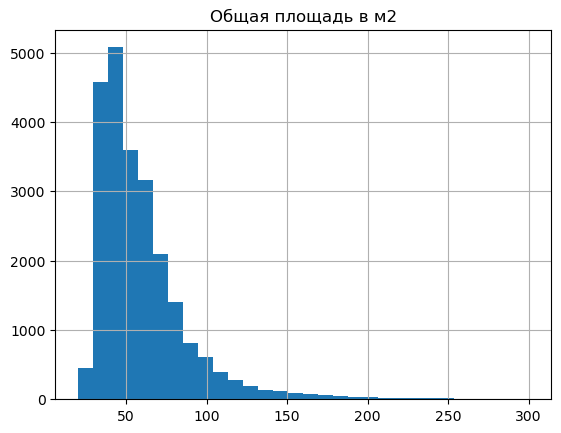

In [46]:
# посмотрим на результат.
realty_data['total_area'].hist(bins=30)
plt.title('Общая площадь в м2')
plt.show()

In [47]:
# realty_data['total_area'].describe() # для себя

- значительная часть квартир к продаже имеет общую площадь ~ 50 м2
- далее по частоте - квартиры до 50 м2
- минимальная площадь 17 м2
- максимальная площадь 300 2

##### жилая площадь

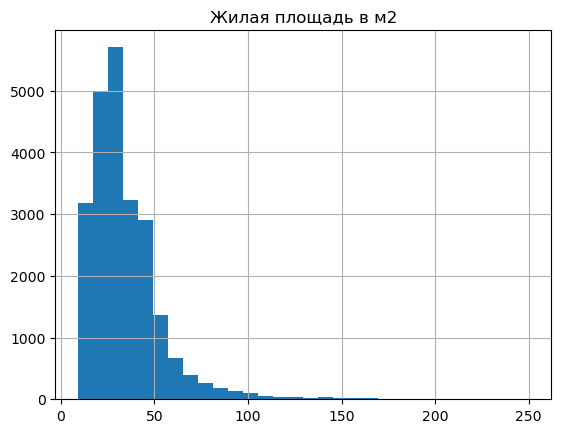

In [48]:
realty_data['living_area'].hist(bins=30)
plt.title('Жилая площадь в м2')
plt.show()

In [49]:
# realty_data['living_area'].describe() # для себя

- значительная часть квартир к продаже имеет жилую площадь от 10 до 20 м2
- далее по частоте ~ 30 м2
- минимальная площадь 9 м2
- максимальная площадь 250 м2

#### площадь кухни

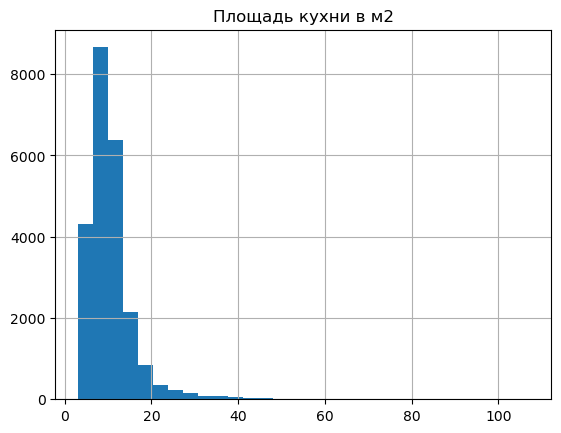

In [50]:
realty_data['kitchen_area'].hist(bins=30)
plt.title('Площадь кухни в м2')
plt.show()

In [51]:
# realty_data['kitchen_area'].describe() # для себя

- значительная часть квартир к продаже имеет площадь кухни ~ 7 м2
- далее по частоте - ~ 10 м2
- минимальная площадь 3 м2
- максимальная площадь 112 м2

#### цена объекта

In [52]:
realty_data['last_price_in_mln'] = realty_data['last_price'] / 1000000

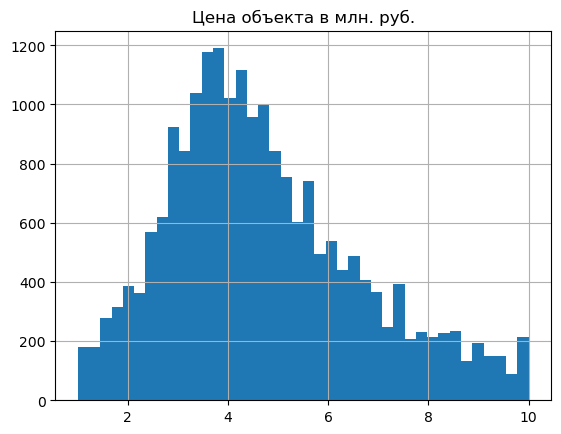

In [53]:
realty_data['last_price_in_mln'].hist(bins=40,range=[1, 10])
plt.title('Цена объекта в млн. руб.')
plt.show()

In [54]:
# print(realty_data['last_price'].describe()) # для себя

- значительная часть квартир к продаже имеет стоимость чуть менее 4 млн. руб.
- минимальная стоимость 430 тыс. руб.
- максимальная стоимость 300 млн.руб

#### количество комнат

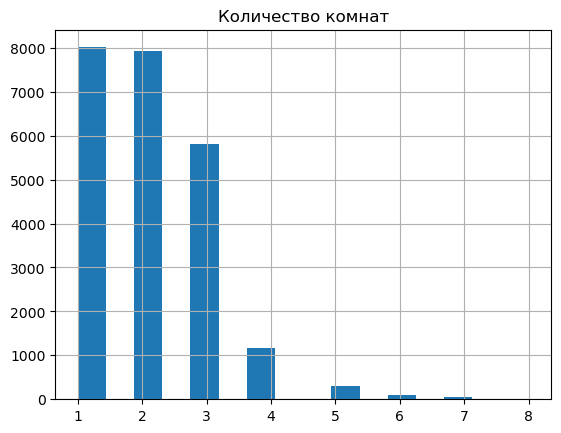

In [55]:
realty_data['rooms'].hist(bins=16)
plt.title('Количество комнат')
plt.show()

In [56]:
# print(realty_data.groupby('rooms')['rooms'].count().sort_values()) # для себя

- значительная часть квартир к продаже имеет 1 комнату
- далее по частоте - 2 комнаты
- минимальная кол-во комнат 1
- максимальное кол-во комнат 19

#### высота потолков

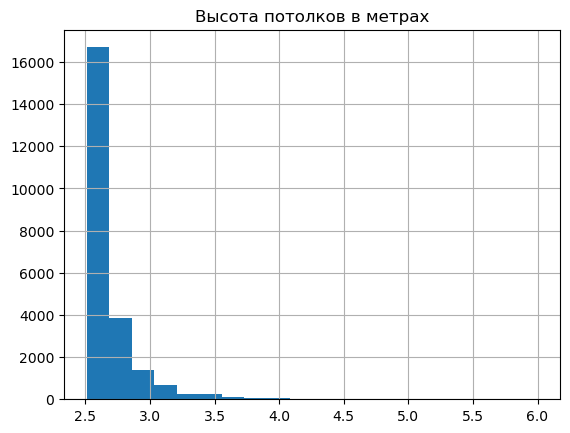

In [57]:
realty_data['ceiling_height'].hist(bins=20)
plt.title('Высота потолков в метрах')
plt.show()

In [58]:
# print(realty_data.groupby('ceiling_height')['ceiling_height'].count().sort_values()) # для себя

- значительная часть квартир к продаже имеет высоту потолков ~ 2,65 м
- далее по частоте - от 2,8 до 3,0 м
- минимальная высота 2,6 м (ограничели синтетически)
- максимальная высота 6 м (ограничили синтетически)

#### этаж квартиры

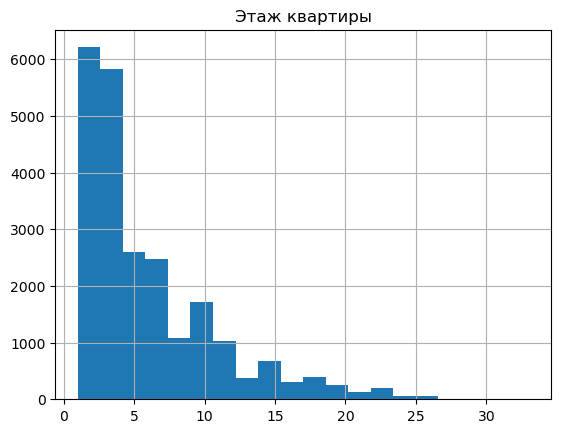

In [59]:
realty_data['floor'].hist(bins=20)
plt.title('Этаж квартиры')
plt.show()

In [60]:
# print(realty_data.groupby('floor')['floor'].count().sort_values()) # для себя
# print(realty_data['floor'].describe()) # для себя

- значительная часть квартир к продаже расположены с 1-го по 3-й этажи
- минимальный этаж 1
- максимальный этаж 33

#### тип этажа квартиры

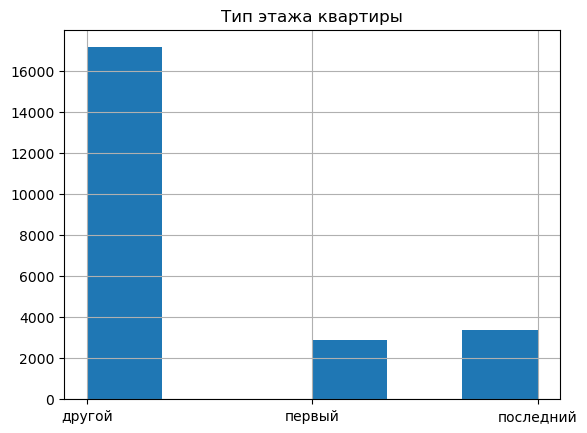

In [61]:
realty_data['which_floor'].hist(bins=6)
plt.title('Тип этажа квартиры')
plt.show()

- значительная часть квартир к продаже расположены не на первом и не на последнем этажах
- на последних этажах квартир больше чем на первых

#### общее количество этажей в доме

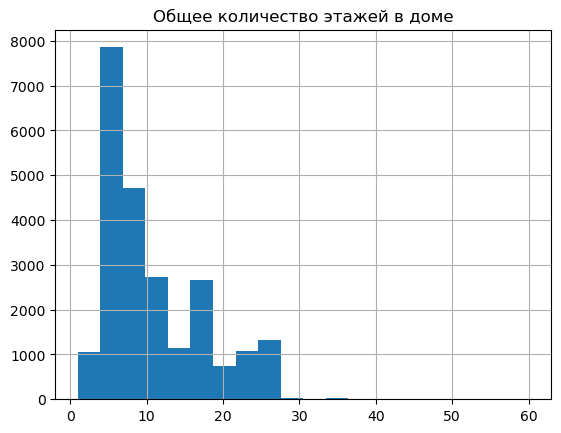

In [62]:
realty_data['floors_total'].hist(bins=20)
plt.title('Общее количество этажей в доме')
plt.show()

In [63]:
# print(realty_data.groupby('floors_total')['floors_total'].count().sort_values()) # для себя
# print(realty_data['floors_total'].describe()) # для себя

- значительная часть квартир расположены в домах с общим количеством этажей = 5
- минимальное количество этажей 1
- максимальное количество этажей 60

#### расстояние до центра города в метрах

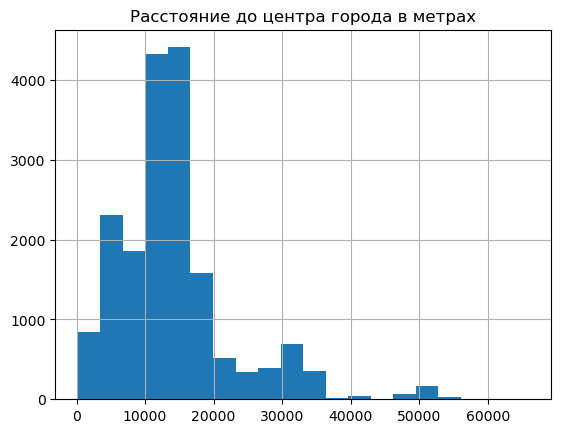

In [64]:
realty_data['cityCenters_nearest'].hist(bins=20)
plt.title('Расстояние до центра города в метрах')
plt.show()

In [65]:
# print(realty_data.groupby('cityCenters_nearest')['cityCenters_nearest'].count().sort_values()) # для себя
# print(realty_data['cityCenters_nearest'].describe()) # для себя

- значительная часть квартир к продаже расположены на расстоянии от 15 до 17 тыс. м. от центра
- минимальное расстояние 181 м
- максимальное расстояние ~ 66 тыс.м.

#### расстояние до ближайшего аэропорта

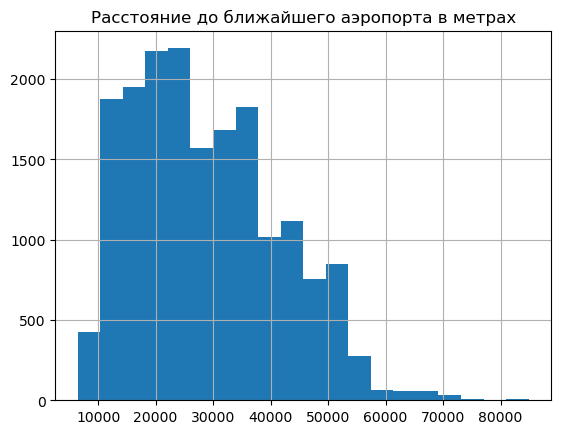

In [66]:
realty_data['airports_nearest'].hist(bins=20)
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.show()

In [67]:
# print(realty_data.groupby('airports_nearest')['cityCenters_nearest'].count().sort_values()) # для себя
# print(realty_data['airports_nearest'].describe()) # для себя

- значительная часть квартир к продаже расположены на расстоянии 22 тыс. м. от аэропорта
- минимальное расстояние 6,5 тыс. м.
- максимальное расстояние ~ 85 тыс.м.

#### расстояние до ближайшего парка

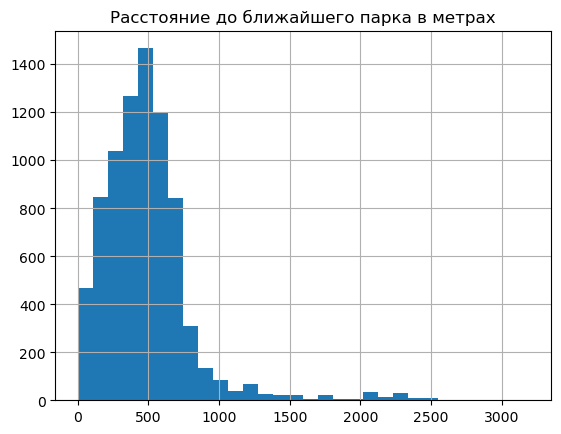

In [68]:
realty_data['parks_nearest'].hist(bins=30)
plt.title('Расстояние до ближайшего парка в метрах')
plt.show()

In [69]:
# print(realty_data.groupby('parks_nearest')['parks_nearest'].count().sort_values()) # для себя
# print(realty_data['parks_nearest'].describe()) # для себя

- значительная часть квартир к продаже расположены на расстоянии 500 м. от парка
- минимальный расстояние 1 м.
- максимальное расстояние ~ 3,2 тыс.м.

#### день публикации объявления

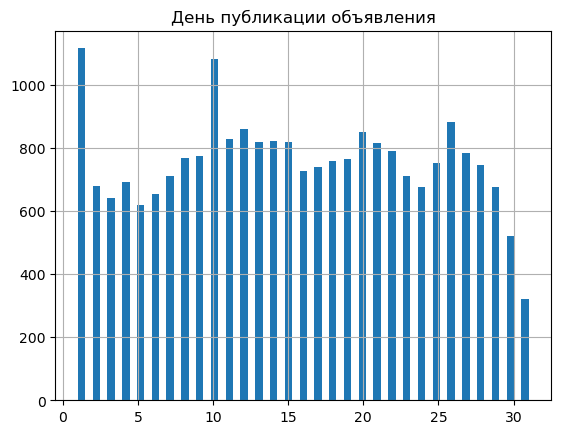

In [70]:
realty_data['day_exposition'].hist(bins=61)
plt.title('День публикации объявления')
plt.show()

- значительная часть объявлений размещены в первый и десятый день месяца
- минимальная часть - 31-го (что, легко объяснимо)

#### день недели публикации объявления

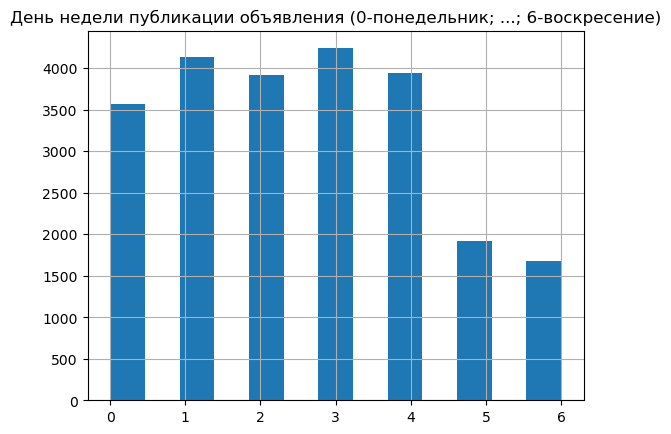

In [71]:
realty_data['day_of_week_exposition'].hist(bins=13)
plt.title('День недели публикации объявления (0-понедельник; ...; 6-воскресение)')
plt.show()

- значительная количество объявлений размещены в будние дни. Наибольшее число - в четверг; чуть меньше - во вторник.
- минимальное количество объявлений размещены в выходные дни. меньше всего в воскресенье (что, легко объяснимо).

#### месяц публикации объявления

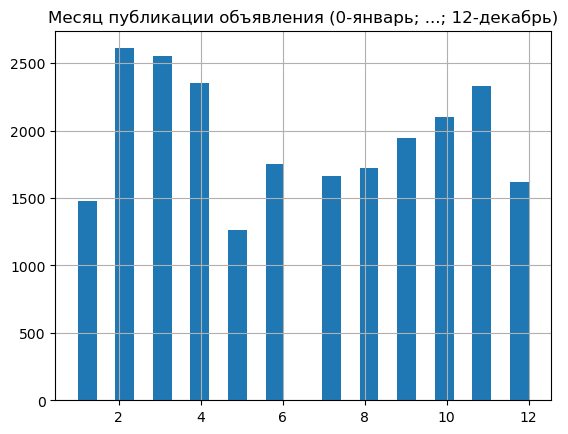

In [72]:
realty_data['month_exposition'].hist(bins=24)
plt.title('Месяц публикации объявления (0-январь; ...; 12-декабрь)')
plt.show()

- значительная часть объявлений размещены в феврале и марте
- минимальная часть - в мае (что, легко объяснимо)

#### 2. Изучение, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

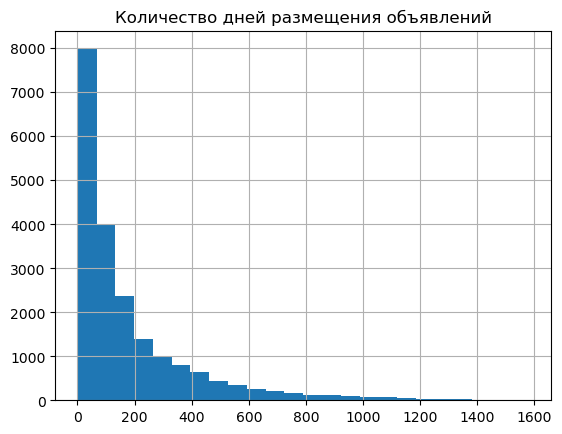

In [73]:
realty_data['days_exposition'].hist(bins=24)
plt.title('Количество дней размещения объявлений')
plt.show()

In [74]:
realty_data['days_exposition'].describe()

count   20,240.00
mean       181.31
std        219.78
min          1.00
25%         45.00
50%         96.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [75]:
print(realty_data.groupby('days_exposition')['days_exposition'].count().sort_values())

days_exposition
1.00        1
975.00      1
971.00      1
969.00      1
964.00      1
         ... 
90.00     201
30.00     202
7.00      226
60.00     532
45.00     866
Name: days_exposition, Length: 1140, dtype: int64


#### вывод: в среднем, время продажи занимает от 90 до 100 дней. Быстрые продажи - до 45 дней. Долгие продажи - от 232 дней.

<Axes: >

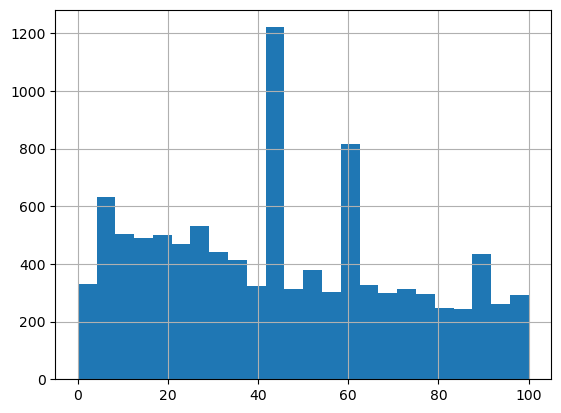

In [76]:
realty_data['days_exposition'].hist(bins=24, range=[0,100])

#### 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

 Смотрим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

// Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

 - построим зависимость цены от общей площади

0.7182411373003257


<Axes: xlabel='total_area'>

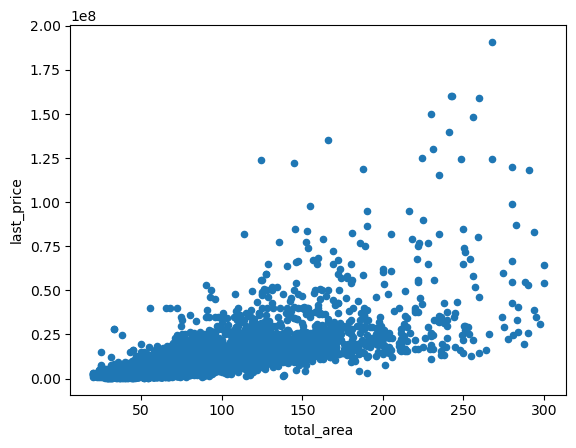

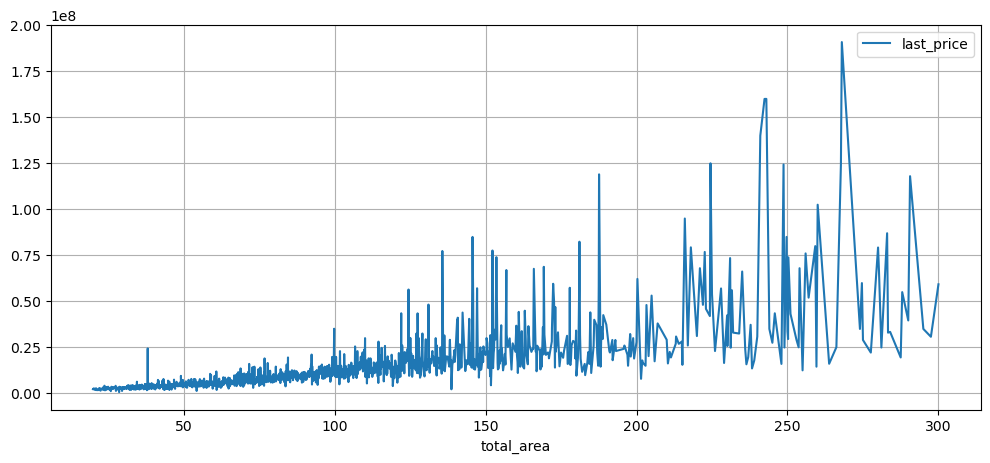

In [77]:
print(realty_data['last_price'].corr(realty_data['total_area'])) # рассчитываем коэффициент корреляции
realty_data.plot(x='total_area', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='total_area', values='last_price').plot(grid=True,figsize=(12, 5)) # строим сводную таблицу 

##### вывод: наблюдается тенденция роста цены в зависимости от увеличения общей площади
есть выброс цены в районе на 400 м2
максимальная цена для 900 м2


 - построим зависимость цены от жилой площади

0.6370910903184308


<Axes: xlabel='living_area'>

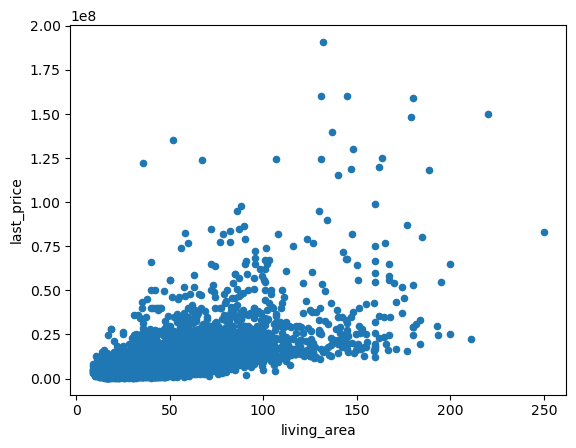

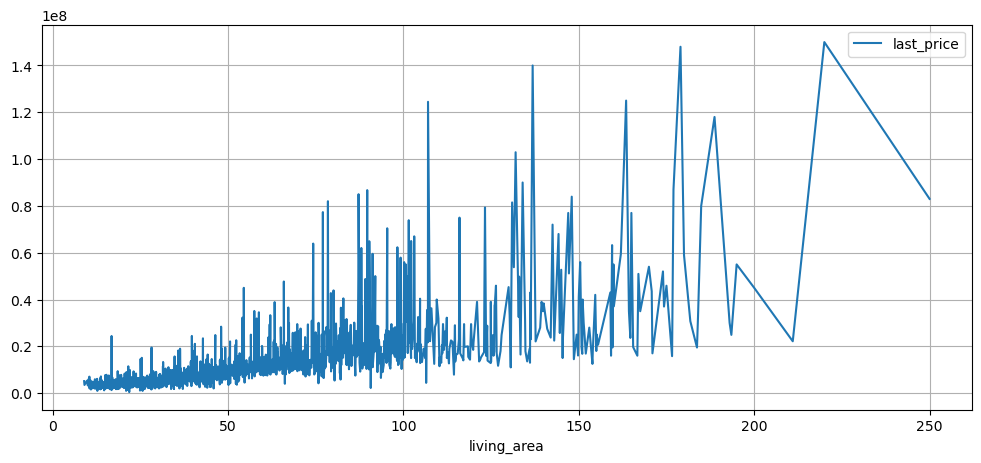

In [78]:
print(realty_data['last_price'].corr(realty_data['living_area'])) # рассчитываем коэффициент корреляции
realty_data.plot(x='living_area', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='living_area', values='last_price').plot(grid=True,figsize=(12, 5)) # строим сводную таблицу

##### вывод: наблюдается тенденция роста цены в зависимости от увеличения жилой площади
есть выброс цены в районе ~ 205 м2
максимальная цена для ~ 420 м2

 - построим зависимость цены от площади кухни

0.5655965532509637


<Axes: xlabel='kitchen_area'>

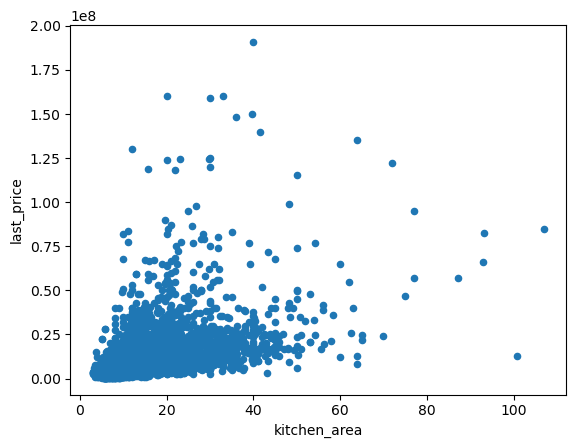

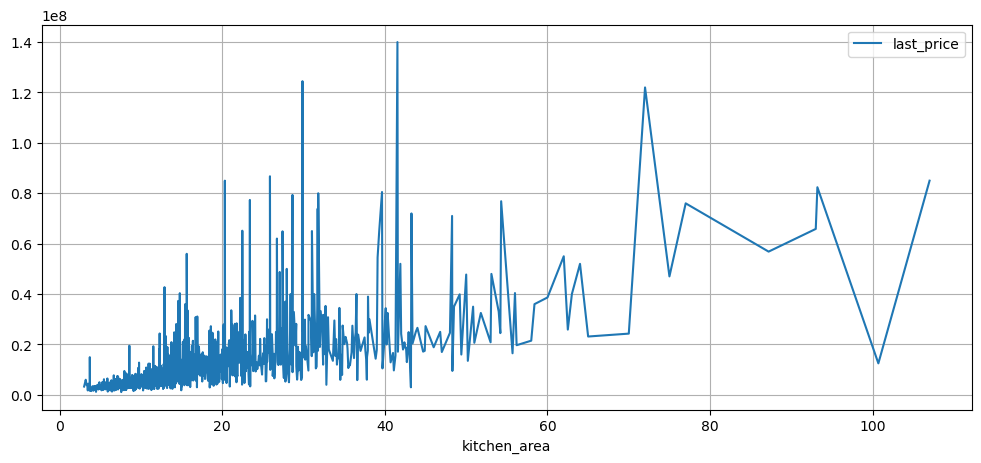

In [79]:
print(realty_data['last_price'].corr(realty_data['kitchen_area'])) # рассчитываем коэффициент корреляции
realty_data.plot(x='kitchen_area', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True,figsize=(12, 5)) # строим сводную таблицу

##### вывод: наблюдается тенденция роста цены в зависимости от увеличения площади кухни
есть выброс цены в районе ~ 70 м2
максимальная цена для ~ 115 м2

 - построим зависимость цены от количества комнат

0.4238179016796653


<Axes: xlabel='rooms'>

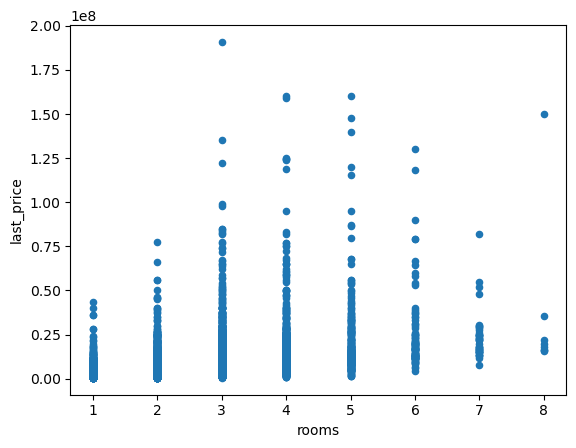

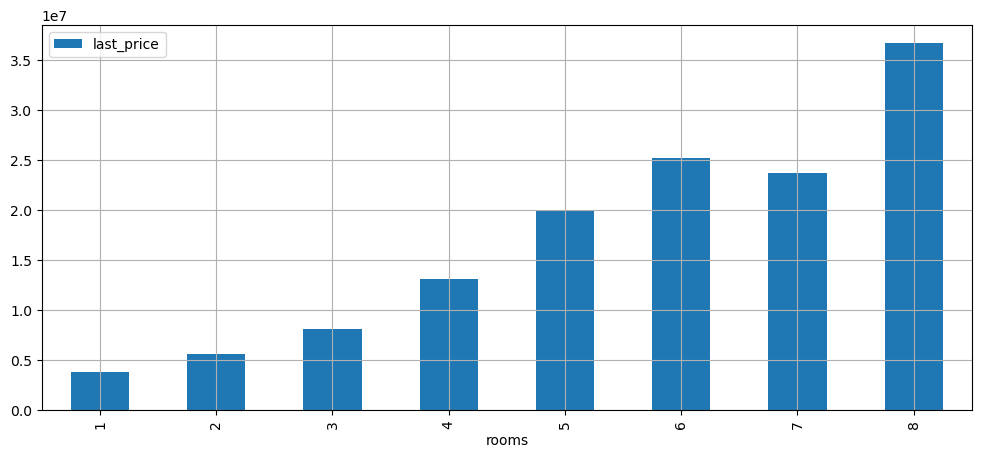

In [80]:
print(realty_data['last_price'].corr(realty_data['rooms'])) # рассчитываем коэффициент корреляции
realty_data.plot(x='rooms', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='rooms', values='last_price').plot(grid=True,figsize=(12, 5), kind='bar') # строим сводную таблицу

##### вывод: наблюдается определённая зависимость цены от количества комнат (до определённого момента 6 комнат)

 - построим зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

<Axes: xlabel='which_floor'>

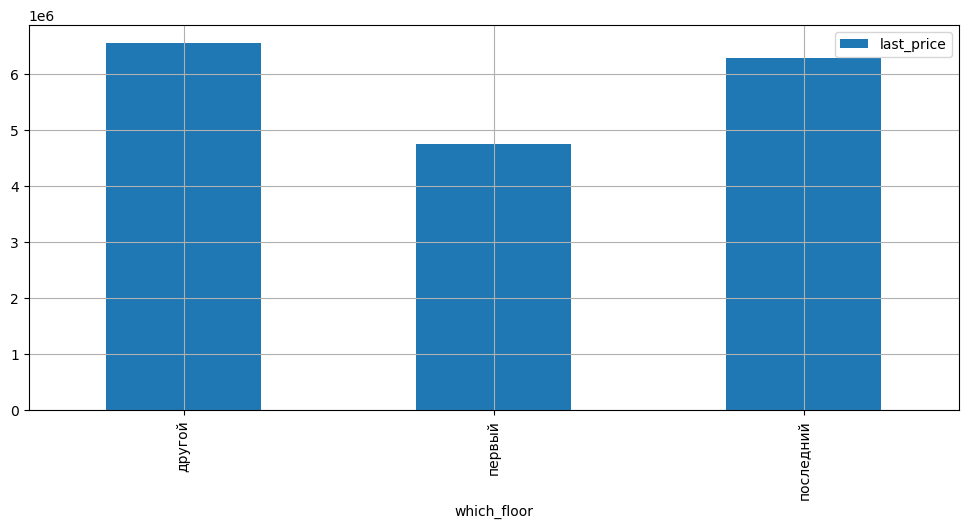

In [81]:
# print(realty_data['last_price'].corr(realty_data['which_floor'])) # рассчитываем коэффициент корреляции
# realty_data.plot(x='which_floor', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='which_floor', values='last_price').plot(grid=True,figsize=(12, 5), kind='bar') # строим сводную таблицу

 - построим зависимость цены от дня размещения

<Axes: xlabel='day_exposition'>

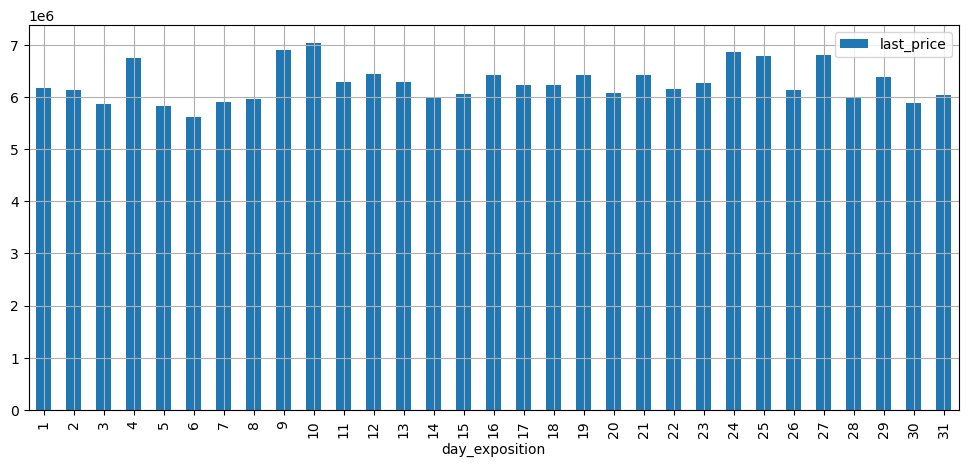

In [82]:
# print(realty_data['last_price'].corr(realty_data['day_exposition'])) # рассчитываем коэффициент корреляции
# realty_data.plot(x='day_exposition', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='day_exposition', values='last_price').plot(grid=True,figsize=(12, 5), kind='bar') # строим сводную таблицу

##### вывод: макисмальные цены у объявлений от 10-го числа, минимальные цены у объявлений от 6-го числа

<Axes: xlabel='day_of_week_exposition'>

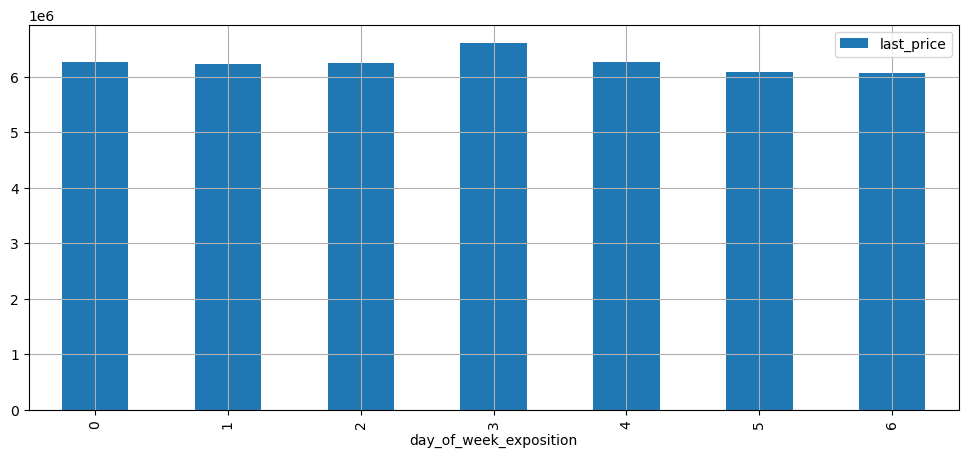

In [83]:
# print(realty_data['last_price'].corr(realty_data['day_of_week_exposition'])) # рассчитываем коэффициент корреляции
# realty_data.plot(x='day_of_week_exposition', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='day_of_week_exposition', values='last_price').plot(grid=True,figsize=(12, 5), kind='bar') # строим сводную таблицу

##### вывод: максимальные цены в объявлениях четверга, минимальные - в воскресных.

 - построим зависимость цены от месяца размещения

<Axes: xlabel='month_exposition'>

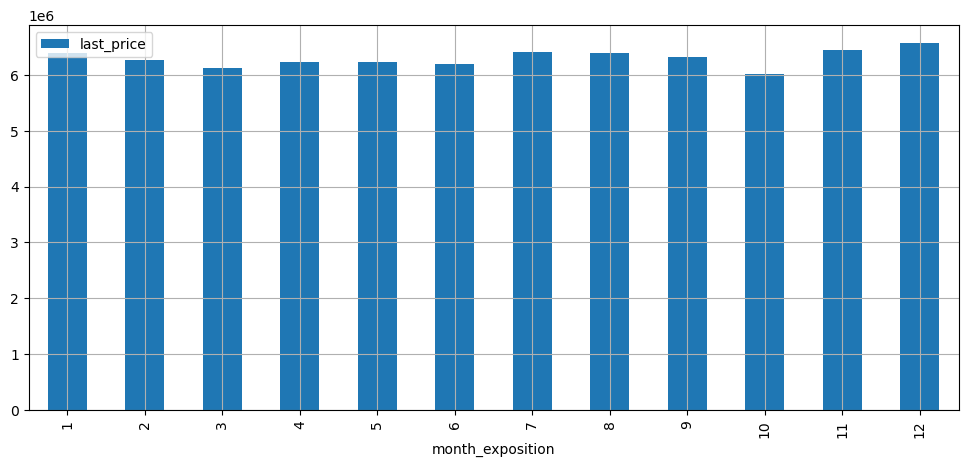

In [84]:
# print(realty_data['last_price'].corr(realty_data['month_exposition'])) # рассчитываем коэффициент корреляции
# realty_data.plot(x='month_exposition', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='month_exposition', values='last_price').plot(grid=True,figsize=(12, 5), kind='bar') # строим сводную таблицу

##### вывод: максимальные цены у объявлений в декабре, минимальные - в октябре.

 - построим зависимость цены от года размещения

<Axes: xlabel='year_exposition'>

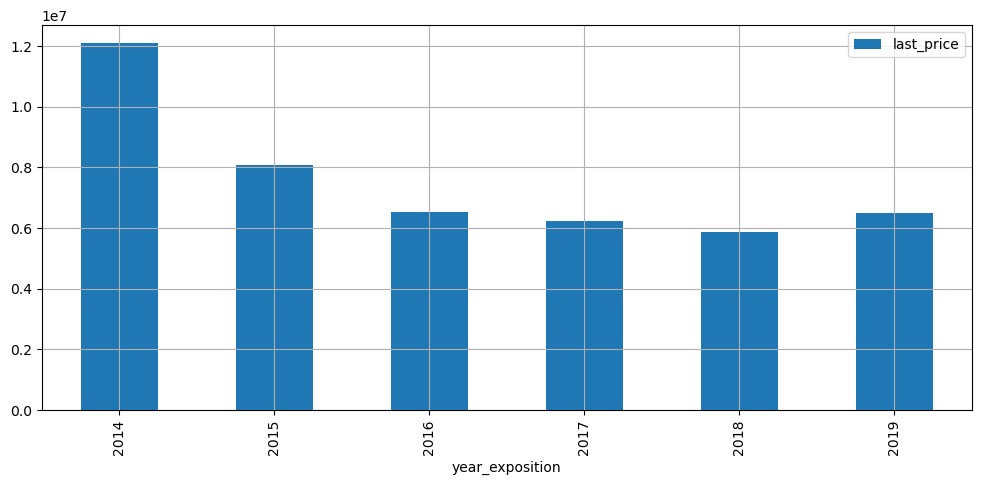

In [85]:
# print(realty_data['last_price'].corr(realty_data['year_exposition'])) # рассчитываем коэффициент корреляции
# realty_data.plot(x='year_exposition', y='last_price', kind='scatter') # строим диаграмму рассеяния
realty_data.pivot_table(index='year_exposition', values='last_price').plot(grid=True,figsize=(12, 5),kind='bar') # строим сводную таблицу

##### вывод: наибольшее количество объявлений было в 2014 году, начиная с 2014 года количество объявлений уменьшалось вплоть до 2018 года, после чего начался подъём.

#### Вывод по разделу:
- на стоимость жилья в бОльшей степени влияют метраж площадей общей, жилой и кухни
- самые дешёвые квартиры - на первых этажах; дорогие - квартиры кроме первого и последнего этажа
- наблюдается определённая зависимость цены от количества комнат (до определённого момента 6 комнат)
- наблюдается небольшая зависимость от года публикации объявления
- день, день недели, месяц не показывают однозначного влияния на стоимость квартир

#### 4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Определяем топ 10 населённых пунктов по количеству объявлений

In [86]:
top_10 = realty_data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
print(top_10)
print('*'*60)
list_top_10 = list(top_10.index)
print(list_top_10)

locality_name
Санкт-Петербург      15507
посёлок Мурино         528
посёлок Шушары         435
Всеволожск             392
Пушкин                 366
Колпино                337
посёлок Парголово      323
Гатчина                307
деревня Кудрово        283
Выборг                 237
Name: locality_name, dtype: int64
************************************************************
['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']


Считаем среднее значение стоимости квадратного метра для каждого из населённых пунктов из Топ 10

In [87]:
mean_price_top_10 = []
for i in range(len(list_top_10)):
    mean_price_top_10.append(realty_data.loc[realty_data['locality_name'] == list_top_10[i],'one_meter_price'].mean())
    print(list_top_10[i], ': ',"{:.2f}".format(mean_price_top_10[i]))

Санкт-Петербург :  114025.23
посёлок Мурино :  85004.58
посёлок Шушары :  78431.25
Всеволожск :  68618.01
Пушкин :  103085.95
Колпино :  75333.30
посёлок Парголово :  90289.78
Гатчина :  68746.15
деревня Кудрово :  92297.22
Выборг :  58141.91


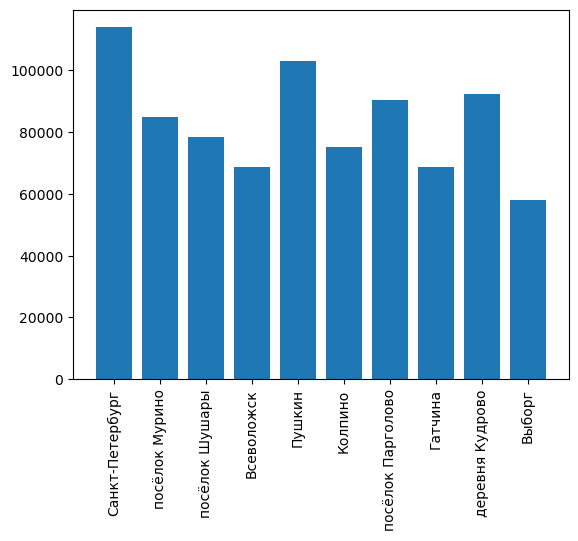

In [88]:
plt.xticks(rotation=90)
plt.bar(list_top_10, mean_price_top_10)
plt.show()


##### вывод: из представленного списка, максимальные стоимость квадратного метра у квартир в Санкт-Петербурге. Чуть дешевле - в Пушкине. Самая дешёвая стоимость квадратного метра - в Выборге.

#### 5 Рассмотрим как стоимость объектов зависит от расстояния до центра города

In [89]:
# посмотрим как изменяется стоимость объекта в зависимости от расстояния до центра
# выделим необходимые зачения в отдельный DF
sankt_petersburg_df = realty_data.loc[realty_data['locality_name'] == 'Санкт-Петербург', ['cityCenters_nearest_km','one_meter_price']]
print(sankt_petersburg_df.sort_values(by='cityCenters_nearest_km')) # проверим какие данные попали в DF

       cityCenters_nearest_km  one_meter_price
21383                       0       131,195.34
13603                       0       188,888.89
19740                       0       187,500.00
11568                       0       255,704.17
1089                        0       364,076.78
...                       ...              ...
800                        28        68,468.47
18702                      28        94,000.00
12862                      29        73,943.66
16578                      29        56,526.81
12003                      29        56,976.74

[15507 rows x 2 columns]


<Axes: xlabel='cityCenters_nearest_km'>

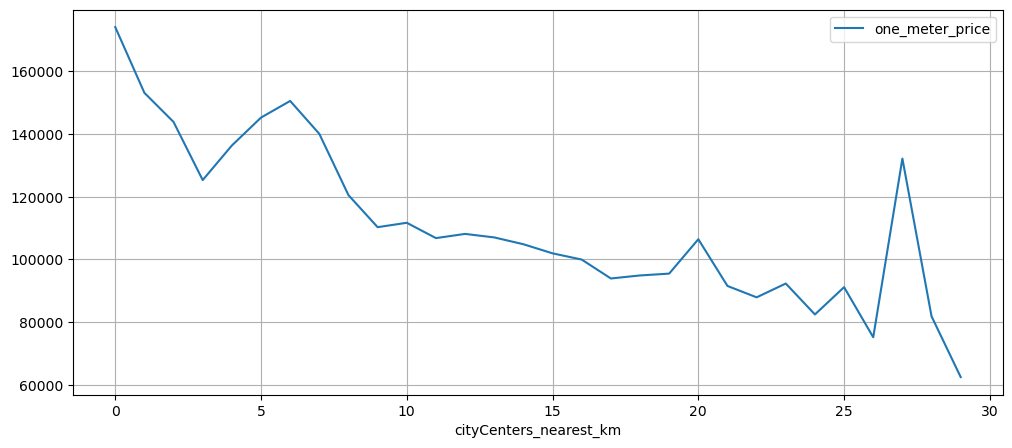

In [90]:
# посмотрим как зависимость выглядит на графике
sankt_petersburg_df.pivot_table(index='cityCenters_nearest_km', values='one_meter_price').plot(grid=True,figsize=(12, 5))

In [91]:
# вычисляем и выводим среднюю стоимость квадратного метра для каждого километра
print(sankt_petersburg_df.groupby('cityCenters_nearest_km')['one_meter_price'].mean().sort_values())

cityCenters_nearest_km
29    62,482.40
26    75,171.91
28    81,840.64
24    82,440.34
22    87,890.85
25    91,136.02
21    91,519.93
23    92,293.83
17    93,900.76
18    94,867.80
19    95,452.57
16    99,934.20
15   101,913.93
14   104,814.91
20   106,410.98
11   106,769.65
13   106,988.83
12   108,103.81
9    110,250.55
10   111,652.25
8    120,458.66
3    125,264.01
27   132,115.71
4    136,276.17
7    139,987.84
2    143,778.55
5    145,173.61
6    150,474.63
1    153,059.84
0    174,013.10
Name: one_meter_price, dtype: float64


#### вывод: наблюдается устойчивая тенденция увеличения стоимости квадратного метра при приближении к центру города.
в таблице результатов есть незначительные отклонения от тенденции, которые могут быть вызваны другими факторами, влияющими на ценообразовании конкретной квартиры.

### E. Общий вывод

#### Раздел A

- скачана изначальная база
- количество строк в базе = 23699
- названия столбцов корректны - > переименования не требуется
- нулевых столбцов нет, но не все столбцы заполнены данными

#### Раздел B

1. заполнены пропуски для:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name

2. не заполнены пропуски для картографических параметров и количества дней размещения

- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest

- days_exposition

3. Были обнаружены и обработаны аномальные значения для:
- ceiling_height
- living_area
- kitchen_area
- last_price
- airports_nearest
- total_aria
- rooms

4. Исправлены названия населённых пунктов для 'locality_name'  

5. были исправлены типы данных для:
 - floors_total  float ->   int
 - is_apartment  object - > bool 
 - balcony       float ->   int
 
6. Рекомендации разработчикам (если такие имеют место быть) зафиксированы в каждом разделе.

#### Раздел C

Были рассчитаны/определены значения (ниже) с добавлением соответствующих столбцов:

- one_meter_price (цена одного квадратного метра)
- day_of_week_exposition (день недели публикации объявления)
- day_exposition (день недели публикации объявления)
- month_exposition (месяц публикации объявления)
- year_exposition (год публикации объявления)
- which_floor (тип этажа квартиры (значения — «первый», «последний», «другой»))
- cityCenters_nearest_km (расстояние до центра города в километрах)


#### Раздел D

##### 1. Изучение параметров

##### общая площадь
значительная часть квартир к продаже имеет общую площадь ~ 50 м2
##### жилая площадь
значительная часть квартир к продаже имеет жилую площадь от 10 до 20 м2
##### площадь кухни
значительная часть квартир к продаже имеет площадь кухни ~ 7 м2
#####  цена объекта
значительная часть квартир к продаже имеет стоимость чуть менее 4 млн. руб.
##### количество комнат
значительная часть квартир к продаже имеет 1 комнату
далее по частоте - 2 комнаты
##### высота потолков
значительная часть квартир к продаже имеет высоту потолков ~ 2,65 м (с учётом корректировок для большого числа некорректных значений)
далее по частоте - от 2,8 до 3,0 м
##### этаж квартиры 
значительная часть квартир к продаже расположены с 1-го по 3-й этажи
##### тип этажа квартиры («первый», «последний», «другой») 
значительная часть квартир к продаже расположены не на первом и не на последнем этажах
на последних этажах квартир больше чем на первых
##### общее количество этажей в доме
значительная часть квартир расположены в домах с общим количеством этажей = 5
##### расстояние до центра города в метрах
значительная часть квартир к продаже расположены на расстоянии от 15 до 17 тыс. м. от центра
##### расстояние до ближайшего аэропорта
значительная часть квартир к продаже расположены на расстоянии 22 тыс. м. от аэропорта
##### расстояние до ближайшего парка
значительная часть квартир к продаже расположены на расстоянии 500 м. от парка
##### день публикации объявления
значительная часть объявлений размещены в первый и десятый день месяца
минимальная часть - 31-го (что, легко объяснимо)
##### день недели публикации объявления
значительное количество объявлений размещены в будние дни. Наибольшее число - в четверг; чуть меньше - во вторник.
минимальное количество объявлений размещены в выходные дни. Меньше всего в воскресенье (что, легко объяснимо).
##### месяц публикации объявления
значительная часть объявлений размещены в феврале и марте
минимальная часть - в мае (что, легко объяснимо)


##### 2. Изучение, как быстро продавались квартиры (столбец days_exposition). 

в среднем, время продажи занимает от 90 до 100 дней. Быстрые продажи - до 45 дней. Долгие продажи - от 232 дней.

##### 3. Изучение какие факторы больше всего влияют на общую (полную) стоимость объекта?

были исследованы зависимости от:
- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

Вывод по разделу:
- на стоимость жилья в бОльшей степени влияют метраж площадей общей, жилой и кухни
- самые дешёвые квартиры - на первых этажах; дорогие - квартиры кроме первого и последнего этажа
- наблюдается определённая зависимость цены от количества комнат (до определённого момента 6 комнат)
- наблюдается небольшая зависимость от года публикации объявления
- день, день недели, месяц не показывают однозначного влияния на стоимость квартир

##### 4. Рассчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
 
 - Топ 10 выглядит следующим образом:
 ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']
 - из представленного списка, максимальные стоимость квадратного метра у квартир в Санкт-Петербурге. Чуть дешевле - в Пушкине. Самая дешёвая стоимость квадратного метра - в Выборге.

##### 5. Рассмотрение как стоимость объектов зависит от расстояния до центра города

- наблюдается устойчивая тенденция увеличения стоимости квадратного метра при приближении к центру города.
- в таблице результатов есть незначительные отклонения от тенденции, которые могут быть вызваны другими факторами, влияющими на ценообразовании конкретной квартиры.
